학습 세트 이미지 수: 60000 개
테스트 세트 이미지 수: 10000 개


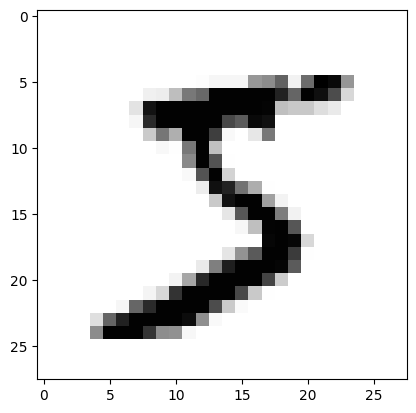

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


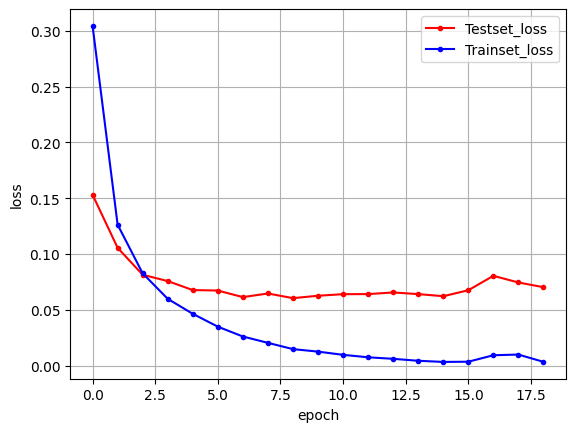

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습 세트 이미지 수: %d 개"%(X_train.shape[0]))
print("테스트 세트 이미지 수: %d 개"%(X_test.shape[0]))

plt.imshow(X_train[0], cmap='Greys')
plt.show()
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t'%i)
    sys.stdout.write('\n')

X_train=X_train.reshape(X_train.shape[0], 784) # 60000 x 28 x 28 -> 60000 x 784
X_train=X_train.astype(float)
X_train=X_train/255
X_test=X_test.reshape(X_test.shape[0], 784).astype(float)/255
print('class: %d' % Y_class_train[0])

Y_train=np_utils.to_categorical(Y_class_train, 10)
Y_test=np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath='data/dataset/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, callbacks=[early_stopping_callback, checkpointer])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
              

학습 세트 이미지 수: 60000 개
테스트 세트 이미지 수: 10000 개
class: 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/30
296/300 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.9154
Epoch 1: val_loss improved from inf to 0.05562, saving model to data/dataset/model\01-0.0556.hdf5
300/300 [==============================] - 8s 11ms/step - loss: 0.2763 - accuracy: 0.9160 - val_loss: 0.0556 - val_accuracy: 0.9825
Epoch 2/30
296/300 [============================>.] - ETA: 0s - loss: 0.0901 - accuracy: 0.9737
Epoch 2: val_loss improved from 0.05562 to 0.04310, saving model to data/dataset/model\02-0.0431.hdf5
300/300 [==============================] - 3s 11ms/step - loss: 0.0900 - accuracy: 0.9737 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9798
Epoch 3: val_loss improved from 0.04310 to 0.03410, saving model to data/dataset/model\03-0.0341.hdf5
300/300 [==============================] - 3s 11ms/step - loss

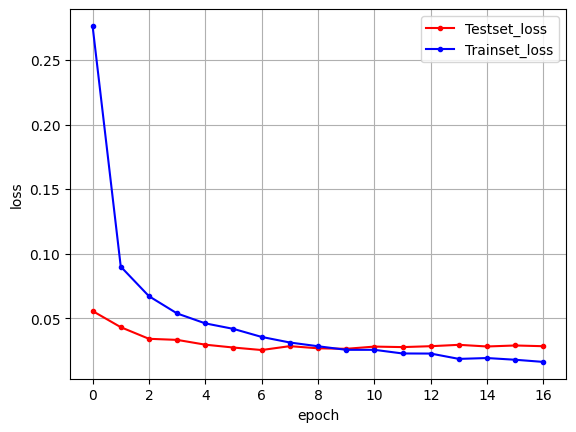

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습 세트 이미지 수: %d 개"%(X_train.shape[0]))
print("테스트 세트 이미지 수: %d 개"%(X_test.shape[0]))

# plt.imshow(X_train[0], cmap='Greys')
# plt.show()
# for x in X_train[0]:
#     for i in x:
#         sys.stdout.write('%d\t'%i)
#     sys.stdout.write('\n')

X_train=X_train.reshape(X_train.shape[0], 28, 28) # 60000 x 28 x 28 -> 60000 x 28 x 28
X_train=X_train.astype(float)
X_train=X_train/255
X_test=X_test.reshape(X_test.shape[0], 28,28).astype(float)/255
print('class: %d' % Y_class_train[0])

Y_train=np_utils.to_categorical(Y_class_train, 10)
Y_test=np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath='data/dataset/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, callbacks=[early_stopping_callback, checkpointer])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()





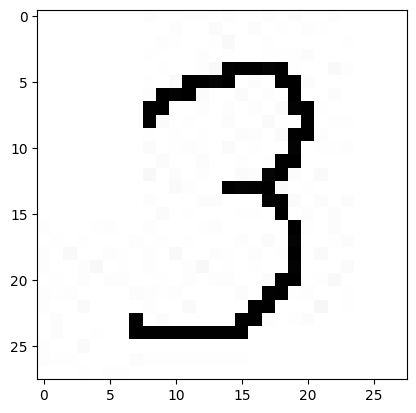

(1, 784)
1/1 [==============================] - 0s 12ms/step
[[9.4169221e-11 6.9336228e-15 9.9363470e-01 1.9344000e-09 0.0000000e+00
  6.3618394e-03 4.1469463e-09 3.4833101e-06 3.9046569e-14 3.3704136e-21]]
[2]
class: 3


In [70]:
import cv2
import matplotlib.cm as cm

img_file='data/sampletext.jpg'
img=cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=cm.gray)
plt.show()
img=img.reshape(1, 784).astype(float)/255
print(img.shape)
img.reshape(1, 784)
answer= model.predict(img)
print(answer)
prediction = answer.argmax(axis = -1) # 예측 결과를 숫자 라벨링 형태로 저장한다.
print(prediction)
print('class: %d' % Y_class_train[7])